<a href="https://colab.research.google.com/github/A01707504/Actividad-3-Valores-At-picos-por-Dataframe-/blob/main/Actividad_3_(Valores_At%C3%ADpicos_por_Dataframe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3 (Valores Atípicos por Dataframe)**

### Analítica de datos y herramientas de inteligencia artificial II (Gpo 501)

**Profesor:** Alfredo García Suárez
Alfredo García Suárez

**Alumno:** Ricardo Saldaña Muñoz | A01707504

***Fecha:*** 03 de octubre de 2023

Importamos las librerías que se necesitarán para la realización de la actividad.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se carga en la variable df el dataset de Gastos y costos 20-23, pero al observar que nuestra dataset contiene las primeras 4 filas valores nulos y los encabezados de nuestras columnas se encuentran en la fila 5, utilizamos el header 5 para que tome a partir de esa fila y lo coloque como encabezados. Hecho esto se imprime el head del df.

In [83]:
df= pd.read_excel('/content/Gastos y costos 20-23.xlsx',sheet_name = "2023", header = 3)
df.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


Se verifica la información del dataframe cargado y podemos ver que existen ciertas columnas con valores nulos.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

Para comprobar los valores nulos identificados utilizamos el siguiente código para identificar los valores nulos existentes en cada columna.

In [85]:
valores_nulos = df.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

Al ver que existen diferentes valores nulos, utilizamos primero el método de backward fill que se utiliza para completar hacia atrás los valores faltantes en la base de datos y después utilizamos el forward fill para aquellos datos de póliza que no se llenarían con el método bfill en un inicio.

In [86]:
df1 = df
df1 = df1.fillna(method = "bfill")
df1 = df1.fillna(method = "ffill")
df1.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,PE01-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,PE01-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


Una vez generado esto, es posible corroborar que ya no se cuentan en ninguna columna valores nulos, mas que en la columna Otros, pero al visualizar la columna no existe ningun valor en la columna por lo que la eliminamos con drop.

In [87]:
df1 = df1.drop(["Otros"], axis = 1)
df1

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,PE111-FEB23
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,I,Vigente,PE111-FEB23
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,I,Vigente,PE111-FEB23
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,I,Vigente,PE111-FEB23


In [88]:
valores_nulos1 = df1.isnull().sum()
valores_nulos1

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

Ya teniendo el dataset sin valores nulos es posible comenzar con el siguiente punto el cual es aplicar métodos (Desviación Estándar y Rango Intercuartílico) para eliminar Outliers, comprobar con diagramas de caja de cada dataframe.

<Figure size 1500x800 with 0 Axes>

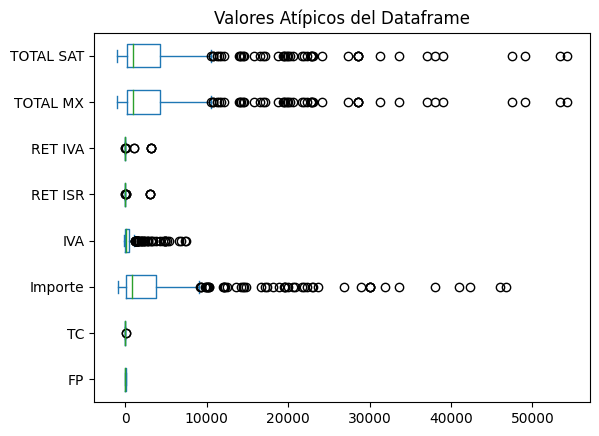

In [89]:
fig = plt.figure(figsize = (15, 8))
df1.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

### **Método Desviación Estándar**

Al observar la cantidad de outliers utilizamos el siguiente código para eliminar outliers en dataframe. El siguiente código es un método aplicando desviación estándar, en el cual se encuentran los valores extremos.

In [90]:
y=df1
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido FP             186.732206
Fecha                 NaT
IVA           3761.774707
Importe      26557.244156
RET ISR        931.175004
RET IVA       1022.471745
TC               4.957143
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: object
Limite Inferior Permitido FP             -98.994171
Fecha                 NaT
IVA          -2766.954304
Importe     -18708.366775
RET ISR       -869.142712
RET IVA       -947.124289
TC               -2.77403
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: object


<ipython-input-90-71463d935de4>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3* y.std()
<ipython-input-90-71463d935de4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3* y.std()
<ipython-input-90-71463d935de4>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3* y.std()
<ipython-input-90-71463d935de4>:3: FutureWarning: DataFrame.mean and DataFram

Como siguiente paso obtenemos los datos, y convertimos los outliers en nulos en el Dataframe.

In [91]:
df2= df1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2

<ipython-input-91-6650430b8e6d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2= df1[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


Una vez haciendo esto eliminamos todas las columnas, dejando solamente las cuantitativas.

In [92]:
df3= df2.drop(['Fecha', 'Folio',	'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 	'Status','Poliza'],axis = 1)
df3

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


Hecho esto podemos observar que solamente se cuentan ya con 8 columnas las cuales son cuantitativas.

In [93]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FP         397 non-null    float64
 1   TC         395 non-null    float64
 2   Importe    384 non-null    float64
 3   IVA        384 non-null    float64
 4   RET ISR    393 non-null    float64
 5   RET IVA    391 non-null    float64
 6   TOTAL MX   388 non-null    float64
 7   TOTAL SAT  388 non-null    float64
dtypes: float64(8)
memory usage: 24.9 KB


Después lo que se realizó fue reemplazar los valores atípicos que se encuentran ahora como valores nulos con el promedio.

In [94]:
df3 = df3.fillna(round(df.mean(),1))
df3

<ipython-input-94-06356c657179>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3 = df3.fillna(round(df.mean(),1))
<ipython-input-94-06356c657179>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df3.fillna(round(df.mean(),1))


,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


Después para comprobar lo anteriormente realizado generamos un código que nos muestre la suma de todas las filas con valores nulos de cada columna, el cual nos muestra que no existen valores nulos.

In [95]:
valores_nulos2 = df3.isnull().sum()
valores_nulos2

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

### **Procedimiento "Cuantiles" para sustituir outliers en dataframe**

Ahora utilizamos el método de cuartiles mostrado en clase:

In [96]:
y=df2

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite Superior permitido", Limite_Superior_iqr)
print("Limite Inferior permitido", Limite_Inferior_iqr)

Limite Superior permitido FP            243.00000
TC              1.00000
Importe      7190.16750
IVA           919.85625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     8503.49625
TOTAL SAT    8503.49625
dtype: float64
Limite Inferior permitido FP           -141.00000
TC              1.00000
Importe     -4159.61250
IVA          -551.91375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4906.41375
TOTAL SAT   -4906.41375
dtype: float64


<ipython-input-96-326046be3b18>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25)
<ipython-input-96-326046be3b18>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75)


Obtenemos datos limpios del dataframe

In [104]:
df4= df2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df4

<ipython-input-104-91b4bb4e2eff>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df4= df2[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [109]:
valores_nulos5 = df4.isnull().sum()
valores_nulos5

Fecha          397
Folio          397
UUID           397
RFC            397
Proveedor      397
TIPO GASTO     397
Descripción    397
MP             397
FP               0
TC               2
Importe         13
IVA             13
RET ISR          4
RET IVA          6
TOTAL MX         9
TOTAL SAT        9
Tipo           397
Status         397
Poliza         397
dtype: int64

Generamos una copia del dataframe 2 con el nombre de df4

In [110]:
df5 = df4.copy()

Una vez haciendo esto eliminamos todas las columnas, dejando solamente las cuantitativas.

In [111]:
df6 = df5.drop(['Fecha', 'Folio',	'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 	'Status','Poliza'], axis=1)
df6

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [113]:
valores_nulos3=df6.isnull().sum()
valores_nulos3

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [114]:
df7 = df6.copy()
df7 = df3.fillna(round(df.mean(),1))
df7

<ipython-input-114-438be65c6929>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df7 = df3.fillna(round(df.mean(),1))
<ipython-input-114-438be65c6929>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7 = df3.fillna(round(df.mean(),1))


,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [115]:
valores_nulos6=df7.isnull().sum()
valores_nulos6

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

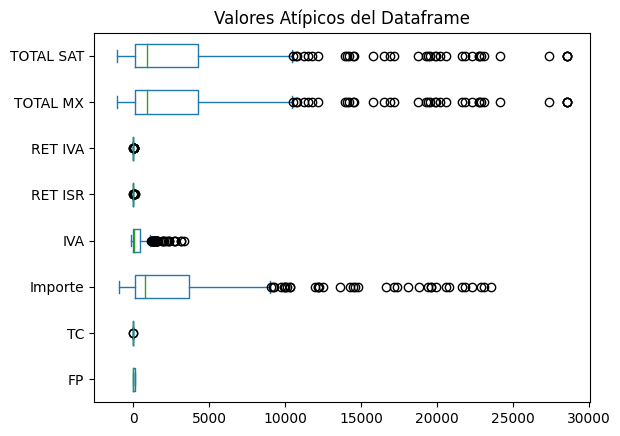

In [116]:
fig = plt.figure(figsize =(15, 8))
df7.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [117]:
ind = df['Fecha']
df_final = pd.concat([ind, df7], axis=1)
df_final

,Fecha,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,2023-02-01,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,2023-02-01,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [118]:
df.to_csv("df.csv")
df1.to_csv("df1.csv")
df2.to_csv("df2.csv")
df3.to_csv("df3.csv")
df4.to_csv("df4.csv")
df5.to_csv("df5.csv")
df6.to_csv("df6.csv")
df7.to_csv("df7.csv")
df_final.to_csv("df_final.csv")